In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

In [16]:
df = pd.read_csv('ochem_clean.csv')

In [17]:
df['mp_bin'] = pd.qcut(df['mp'], 2, labels=[0,1])
df['len_smiles'] = [len(smiles) for smiles in df['SMILES']]

In [18]:
df

,SMILES,mp,NAME,Melting Point,mp_bin,len_smiles
0,C(CCC)C1=NC=CC2=C(C=CC=C12)[N+](=O)[O-],69.25,1-n-butyl-5-nitro-isoquinoline,69.0 - 69.5,0,39
1,ClC=1N=CC2=CC=CC(=C2C1)N,176.50,3-chloro-5-amino-isoquinoline,176.0 - 177.0,1,24
2,ClC1=NC(=CC2=C(C=CC=C12)[N+](=O)[O-])C,112.00,1-chloro-3-methyl-5-nitro-isoquinoline,112.0,0,38
3,C(CCCCCCCCCCC)C=1C(C=CC(C1)=O)=S,131.50,2-dodecylthio-p-benzoquinone,131.0 - 132.0,0,32
4,[N+](=O)([O-])OCC12CC(C3C4(C=CC(C=C4CCC3C1CCC2...,163.00,"11,18-dihydroxy-pregna-1,4-diene-3,20-dione 18...",162.0 - 164.0,1,59
...,...,...,...,...,...,...
274978,CS(=O)(=O)C1CCN(CC1)CC2=CC=C(COC3=C4CN(C(C4=CC...,174.00,3-(4-((4-((4-(methylsulfonyl)piperidin-1-yl)me...,173.0 - 175.0,1,74
274979,C(C)OC(OC=1C(NC(C1C2=C(C=CC(=C2)C)C)=O)CC3CCS(...,88.00,"carbonic acid 4-(2,5-dimethyl-phenyl)-5-oxo-2-...",87.0 - 89.0,0,72
274980,C(C)(C)(C)OC(C(NC(=O)OCC1=CC=CC=2C3=CC=CC=C3CC...,53.00,"N-Fluorenylmethoxycarbonyl-S-[2,3-bis(palmitoy...",52.0 - 54.0,0,101
274981,C1(=CC=CC=2C3=CC=CC=C3CC12)COC(=O)NC(CSCC(COC(...,83.00,"N-Fluorenylmethoxycarbonyl-S-[2,3-bis(palmitoy...",82.0 - 84.0,0,93


In [19]:
import random

df['SMILES_random'] = [''.join(random.sample(list(i), len(list(i)))) for i in df['SMILES']]
df['name_smiles'] = [f"{name} ({smiles})" for name, smiles in zip(df['NAME'], df['SMILES'])]

# Plot histogram

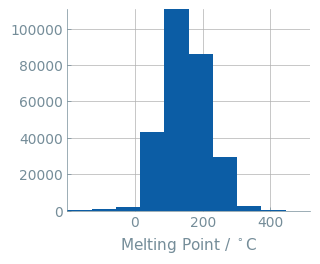

In [20]:
df['mp'].hist()
plt.tight_layout()
plt.xlabel('Melting Point / $^\circ$C')
plt.savefig('MeltingPoint_hist.pdf', bbox_inches='tight')

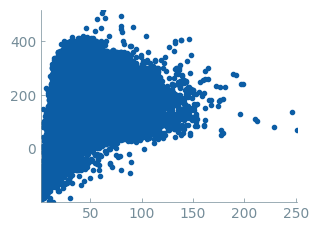

In [21]:
plt.scatter(df['len_smiles'], df['mp'])

Drop the entries that do not even have SMILES or metal source.

In [22]:
df_nodupli = df.drop_duplicates('NAME')
df_nodupli = df_nodupli.drop_duplicates('SMILES')

In [23]:
df_nodupli.to_csv('train_meltingPoint_noDuplicates.csv')